## 2.数据探索分析（EDA） 

**首先做train_bank数据集的工作**

### 2.1 读取数据

In [1]:
#导入相关包和数据
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

train_bank = pd.read_csv(r'F:\datawhale\tianchi\个贷违约预测\train_dataset\train_public.csv')
train_internet = pd.read_csv(r'F:\datawhale\tianchi\个贷违约预测\train_dataset\train_internet.csv')
test = pd.read_csv(r'F:\datawhale\tianchi\个贷违约预测\test_public.csv')
train_bank.head(5)

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,...,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault
0,1040418,240418,31818.18182,3,11.466,1174.91,C,政府机构,金融业,3 years,...,1,1.0,0.0,4.0,5.0,4.0,3,9927,0.0,0
1,1025197,225197,28000.00000,5,16.841,670.69,C,政府机构,金融业,10+ years,...,1,7.0,0.0,4.0,45.0,22.0,0,0,0.0,0
2,1009360,209360,17272.72727,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,...,1,6.0,0.0,6.0,28.0,19.0,0,0,0.0,0
3,1039708,239708,20000.00000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,...,1,5.0,0.0,10.0,15.0,9.0,0,0,0.0,0
4,1027483,227483,15272.72727,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,...,1,10.0,0.0,6.0,15.0,4.0,0,0,0.0,0


### 2.2 总体了解数据

In [2]:
#查看数据维度
train_bank.shape

(10000, 39)

In [3]:
train_bank.columns

Index(['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest',
       'monthly_payment', 'class', 'employer_type', 'industry', 'work_year',
       'house_exist', 'censor_status', 'issue_date', 'use', 'post_code',
       'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low',
       'scoring_high', 'known_outstanding_loan', 'known_dero',
       'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status',
       'app_type', 'earlies_credit_mon', 'title', 'policy_code', 'f0', 'f1',
       'f2', 'f3', 'f4', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'isDefault'],
      dtype='object')

查看一下具体的列名，赛题理解部分已经给出具体的特征含义，这里方便阅读再给一下：

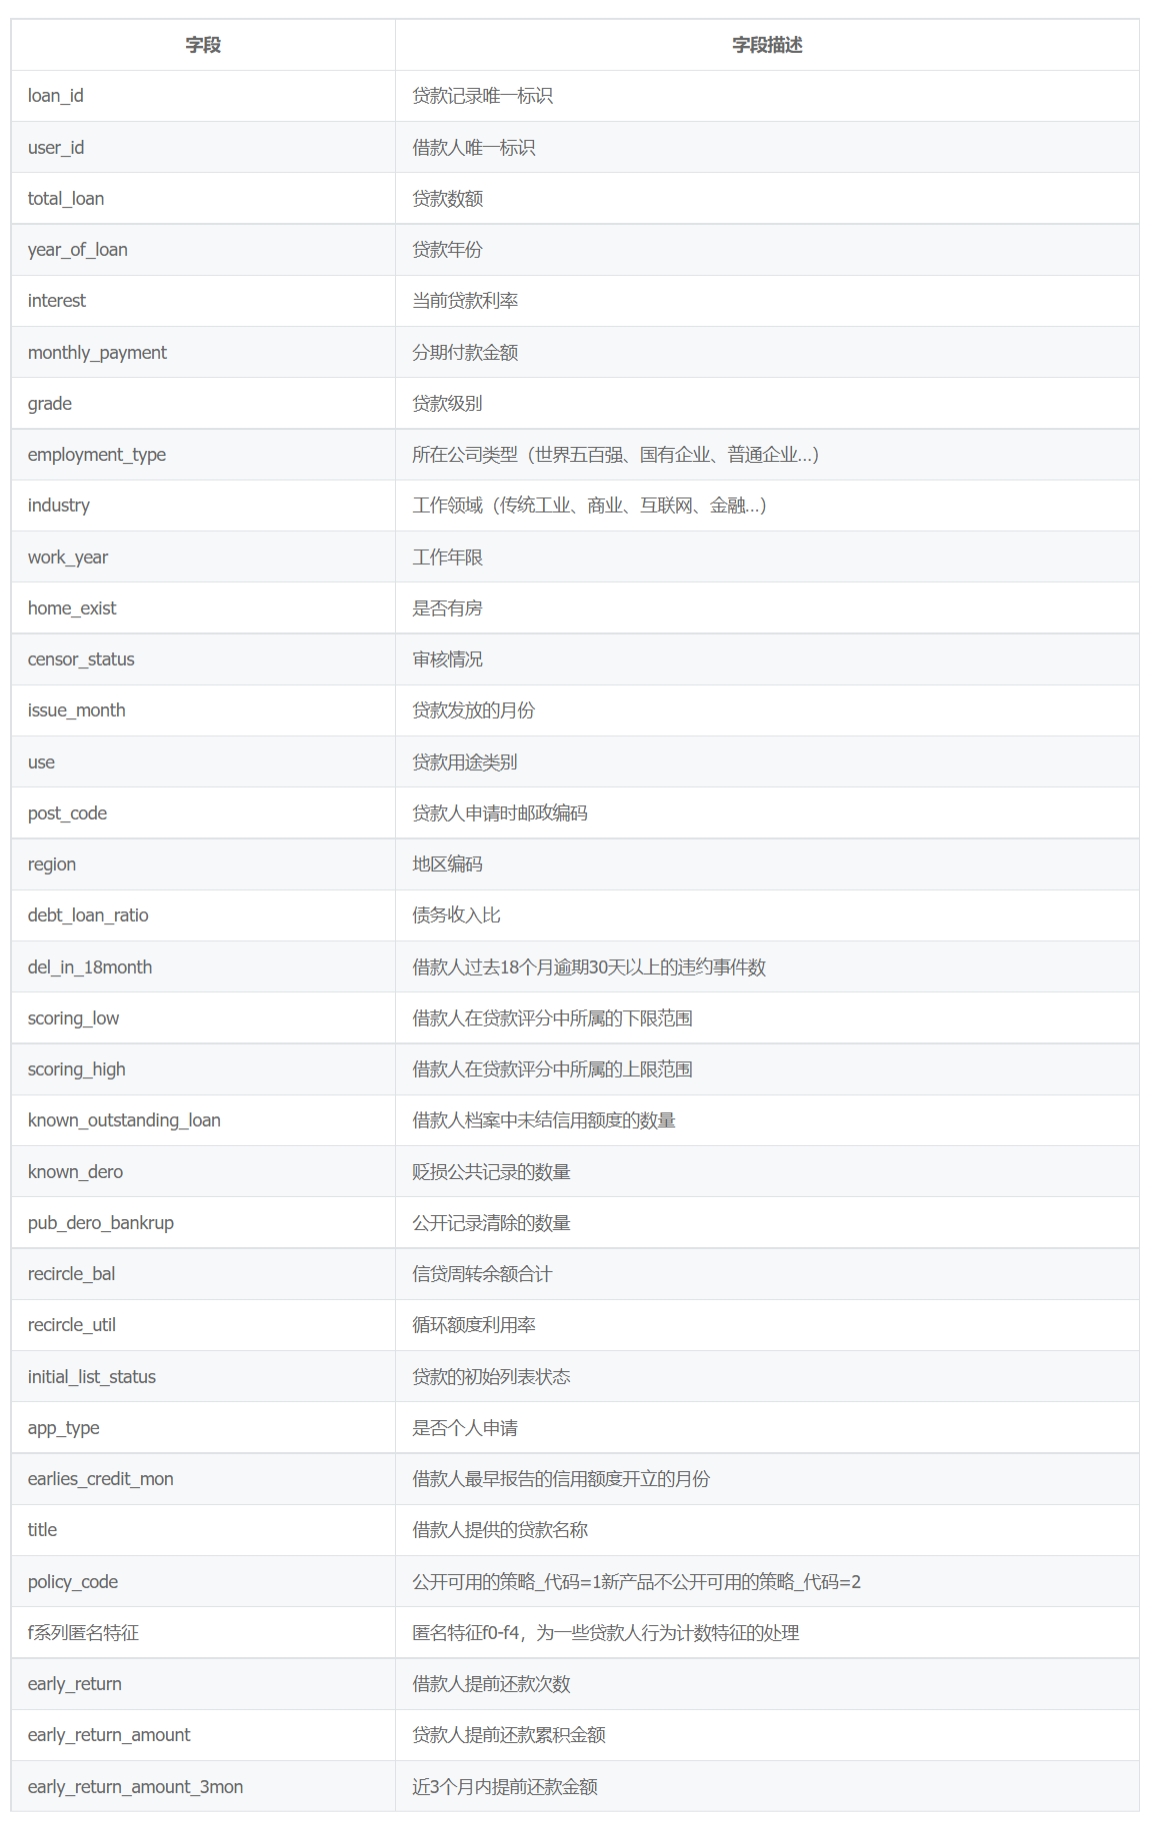

In [4]:
#查看数据集数据类型
train_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   10000 non-null  int64  
 1   user_id                   10000 non-null  int64  
 2   total_loan                10000 non-null  float64
 3   year_of_loan              10000 non-null  int64  
 4   interest                  10000 non-null  float64
 5   monthly_payment           10000 non-null  float64
 6   class                     10000 non-null  object 
 7   employer_type             10000 non-null  object 
 8   industry                  10000 non-null  object 
 9   work_year                 9378 non-null   object 
 10  house_exist               10000 non-null  int64  
 11  censor_status             10000 non-null  int64  
 12  issue_date                10000 non-null  object 
 13  use                       10000 non-null  int64  
 14  post_co

In [5]:
#总体粗略查看各特征的一些基本统计量
train_bank.describe()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,house_exist,censor_status,use,post_code,...,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.0,9502.000000,9142.000000,9502.000000,9502.000000,9502.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.025210e+06,225209.587700,14402.126591,3.479600,13.222782,436.960427,0.612200,1.014600,1.762600,257.519100,...,1.0,5.690486,0.001422,8.467796,14.659019,8.098085,1.290600,2173.916100,335.232240,0.168300
std,1.438682e+04,14386.820956,8953.946807,0.853965,4.875755,261.754396,0.672203,0.787686,2.392031,201.351778,...,0.0,3.298546,0.037685,7.315953,8.263954,4.871797,1.449469,3027.539977,635.108825,0.374151
min,1.000008e+06,200008.000000,818.181818,3.000000,4.779000,30.440000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.012973e+06,212973.250000,7500.000000,3.000000,9.702000,248.820000,0.000000,0.000000,0.000000,99.000000,...,1.0,3.000000,0.000000,4.000000,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.025276e+06,225276.500000,12272.727270,3.000000,12.639000,371.525000,1.000000,1.000000,0.000000,197.000000,...,1.0,5.000000,0.000000,7.000000,13.000000,7.000000,1.000000,838.500000,0.000000,0.000000
75%,1.037694e+06,237694.500000,19636.363640,3.000000,15.985500,573.830000,1.000000,2.000000,4.000000,390.000000,...,1.0,7.000000,0.000000,11.000000,19.000000,11.000000,3.000000,3354.250000,413.675000,0.000000
max,1.049997e+06,249997.000000,47272.727270,5.000000,33.979000,1503.890000,4.000000,2.000000,13.000000,901.000000,...,1.0,33.000000,1.000000,93.000000,88.000000,50.000000,5.000000,18413.000000,5523.900000,1.000000


### 2.3 缺失值查看

In [6]:
print(f'这里有 {train_bank.isnull().any().sum()} 行数据具有缺失值')

这里有 7 行数据具有缺失值


上面得到训练集有7列特征有缺失值，进一步查看缺失特征中缺失率大于50%的特征

In [7]:
#计算每个数据的缺失比率，返回值转换成字典
have_null_fea_dict = (train_bank.isnull().sum()/len(train_bank)).to_dict()
fea_null_moreThanHalf = {}
#查找缺失值比例大于0.5的，have_null_fea_dict.items()返回值为数组
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value
fea_null_moreThanHalf

{}

具体的查看缺失特征及缺失率

<AxesSubplot:>

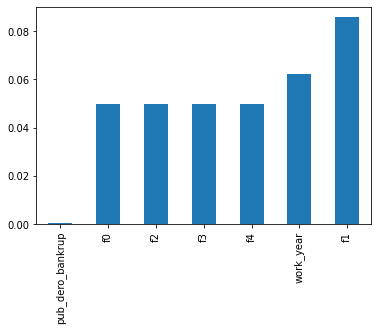

In [8]:
# 缺失值可视化可视化
missing = train_bank.isnull().sum()/len(train_bank)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

缺失值所处位置

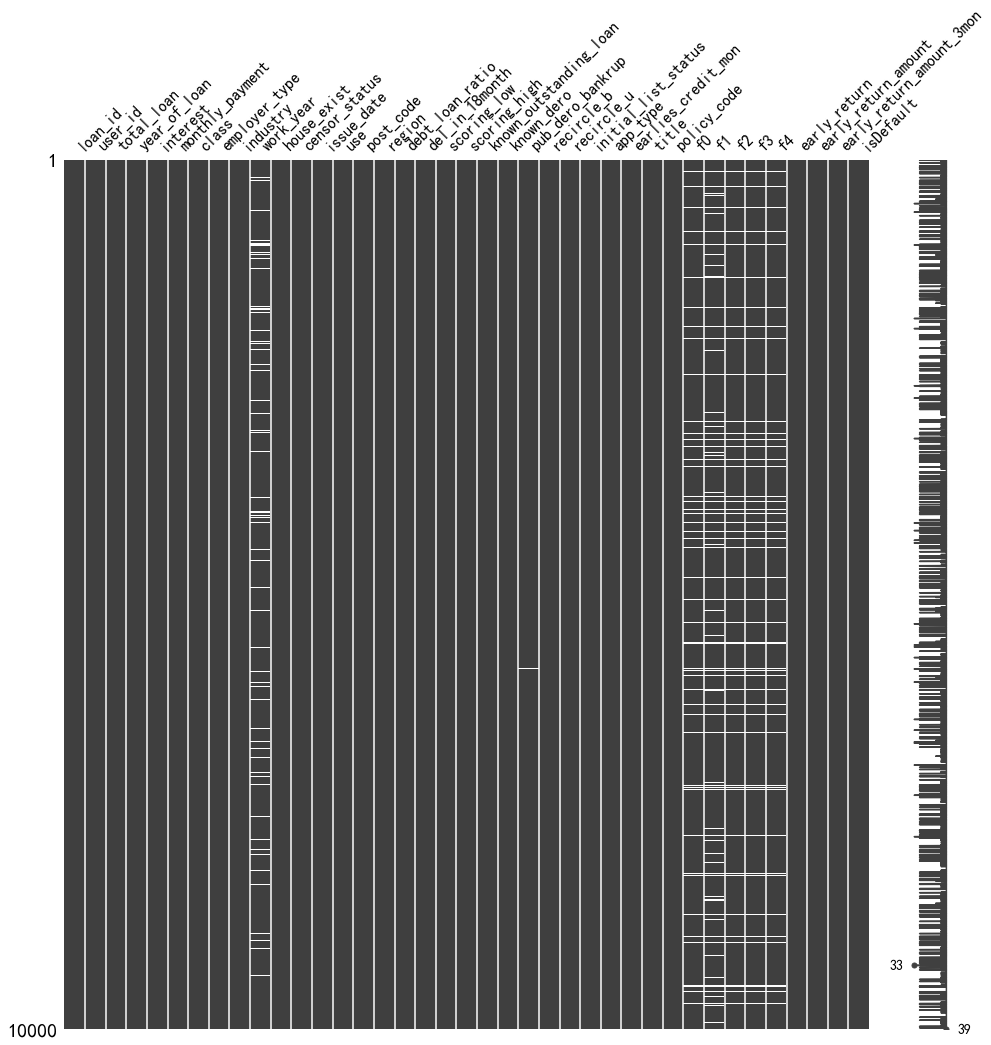

In [9]:

import missingno as msno   
from matplotlib import pyplot as plt
msno.matrix(train_bank.sample(train_bank.shape[0]), figsize=(16, 16), width_ratios=(15, 1))
plt.rcParams['font.sans-serif']=['SimHei']   #这两行用来显示汉字
plt.rcParams['axes.unicode_minus'] = False
plt.show()

### 2.4 查看唯一值

In [10]:
one_value_fea_test = [col for col in test.columns if test[col].nunique() <= 1]
print(one_value_fea_test)

['policy_code']


In [11]:
#分组聚合查看
train_bank.groupby(['policy_code'])[['user_id']].count()

,user_id
policy_code,
1,10000


<AxesSubplot:xlabel='policy_code'>

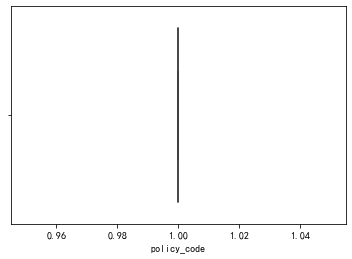

In [12]:
#画图显示唯一值的分布情况
import seaborn as sns 
sns.boxplot(train_bank['policy_code'])

In [13]:
train_bank['policy_code']

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: policy_code, Length: 10000, dtype: int64

### 2.5 查看正负样本比例

正负样本的数量：
 isDefault
0    8317
1    1683
Name: user_id, dtype: int64


<AxesSubplot:xlabel='isDefault', ylabel='count'>

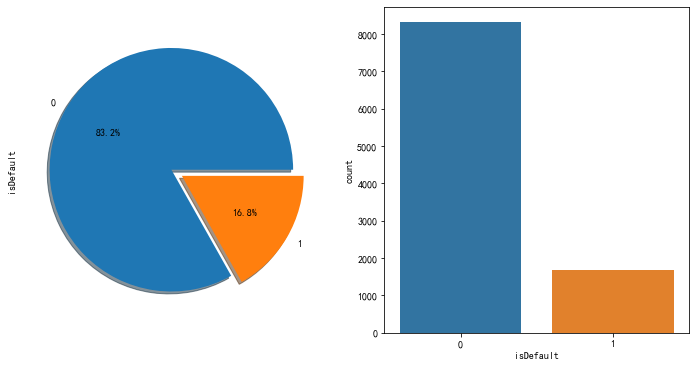

In [14]:
#查看正负样本数量
label_gp = train_bank.groupby('isDefault')['user_id'].count()
print('正负样本的数量：\n',label_gp)
_,axe = plt.subplots(1,2,figsize=(12,6))
train_bank.isDefault.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],ax=axe[0])
sns.countplot('isDefault',data=train_bank,ax=axe[1])

### 按数据类型查看特征

### 2.6 文本型特征

In [15]:
##选出数据类型是object的列名
numerical_fea = list(train_bank.select_dtypes(exclude=['object']).columns)
##选出数据类型不是object的列名
category_fea = list(filter(lambda x: x not in numerical_fea,list(train_bank.columns)))

In [16]:
numerical_fea

['loan_id',
 'user_id',
 'total_loan',
 'year_of_loan',
 'interest',
 'monthly_payment',
 'house_exist',
 'censor_status',
 'use',
 'post_code',
 'region',
 'debt_loan_ratio',
 'del_in_18month',
 'scoring_low',
 'scoring_high',
 'known_outstanding_loan',
 'known_dero',
 'pub_dero_bankrup',
 'recircle_b',
 'recircle_u',
 'initial_list_status',
 'app_type',
 'title',
 'policy_code',
 'f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'early_return',
 'early_return_amount',
 'early_return_amount_3mon',
 'isDefault']

In [17]:
category_fea

['class',
 'employer_type',
 'industry',
 'work_year',
 'issue_date',
 'earlies_credit_mon']

         比例      数量
class              
A      1698  0.1698
B      2965  0.2965
C      2859  0.2859
D      1483  0.1483
E       693  0.0693
F       241  0.0241
G        61  0.0061


<AxesSubplot:xlabel='class', ylabel='count'>

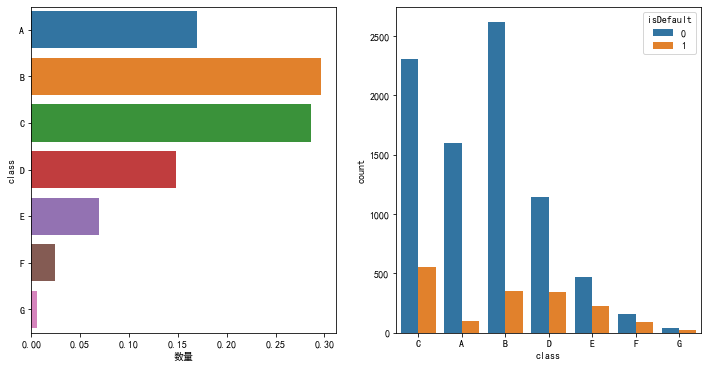

In [18]:
###class特征
#查看类型比例
class_gp = train_bank.groupby('class')['user_id'].count()
class_gp=pd.concat([class_gp,class_gp/len(train_bank)],axis=1)
class_gp.columns={'数量','比例'}
print(class_gp)
###画图可视化
_,axe = plt.subplots(1,2,figsize=(12,6))
sns.barplot(x=class_gp['数量'],y=class_gp.index,ax=axe[0])
sns.countplot(x='class',hue='isDefault',data=train_bank,ax=axe[1])

                 比例      数量
employer_type              
上市企业            958  0.0958
世界五百强           542  0.0542
幼教与中小学校        1053  0.1053
政府机构           2474  0.2474
普通企业           4610  0.4610
高等教育机构          363  0.0363


<AxesSubplot:xlabel='employer_type', ylabel='count'>

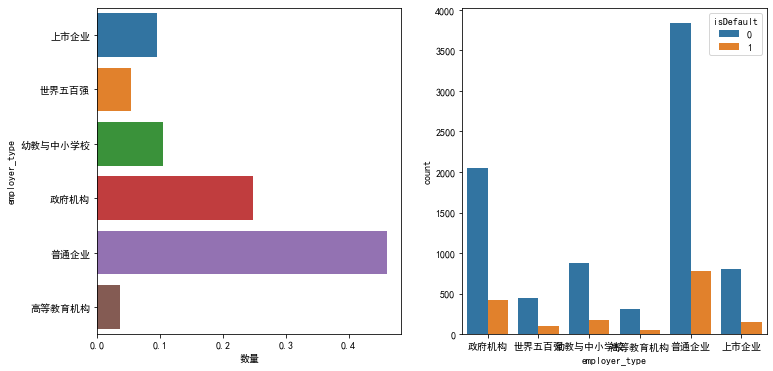

In [19]:
###employer_type特征
#查看类型比例
employer_type_gp = train_bank.groupby('employer_type')['user_id'].count()
employer_type_gp=pd.concat([employer_type_gp,employer_type_gp/len(train_bank)],axis=1)
employer_type_gp.columns={'数量','比例'}
print(employer_type_gp)
###画图可视化
_,axe = plt.subplots(1,2,figsize=(12,6))
sns.barplot(x=employer_type_gp['数量'],y=employer_type_gp.index,ax=axe[0])
sns.countplot(x='employer_type',hue='isDefault',data=train_bank,ax=axe[1])

                   比例      数量
industry                     
交通运输、仓储和邮政业       492  0.0492
住宿和餐饮业            907  0.0907
信息传输、软件和信息技术服务业   808  0.0808
公共服务、社会组织        1065  0.1065
农、林、牧、渔业          466  0.0466
制造业               302  0.0302
国际组织              247  0.0247
建筑业               704  0.0704
房地产业              554  0.0554
批发和零售业            279  0.0279
文化和体育业            793  0.0793
电力、热力生产供应业       1248  0.1248
采矿业               506  0.0506
金融业              1629  0.1629


<AxesSubplot:xlabel='industry', ylabel='count'>

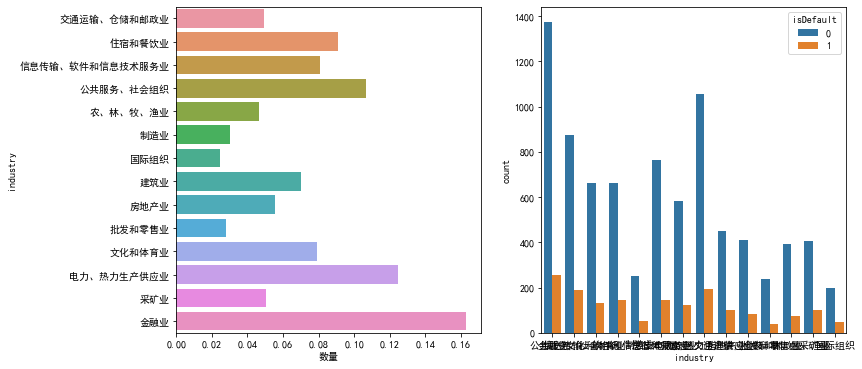

In [20]:
###industry特征
#查看类型比例
industry_gp = train_bank.groupby('industry')['user_id'].count()
industry_gp=pd.concat([industry_gp,industry_gp/len(train_bank)],axis=1)
industry_gp.columns={'数量','比例'}
print(industry_gp)
###画图可视化
_,axe = plt.subplots(1,2,figsize=(12,6))
sns.barplot(x=industry_gp['数量'],y=industry_gp.index,ax=axe[0])
sns.countplot(x='industry',hue='isDefault',data=train_bank,ax=axe[1])

             比例      数量
work_year              
1 year      671  0.0671
10+ years  3370  0.3370
2 years     848  0.0848
3 years     776  0.0776
4 years     562  0.0562
5 years     623  0.0623
6 years     476  0.0476
7 years     436  0.0436
8 years     458  0.0458
9 years     393  0.0393
< 1 year    765  0.0765


<AxesSubplot:xlabel='work_year', ylabel='count'>

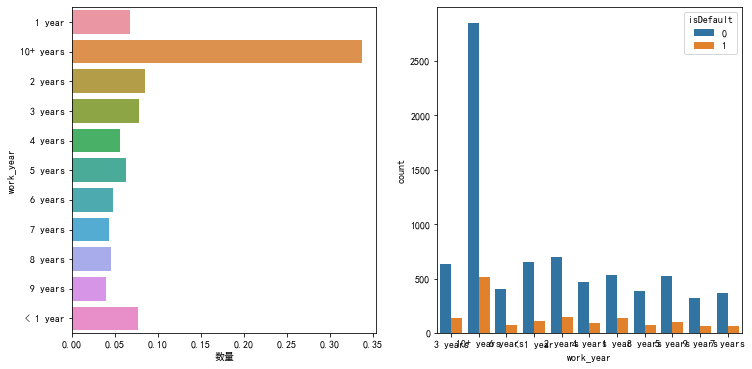

In [21]:
###work_year特征
#查看类型比例
work_year_gp = train_bank.groupby('work_year')['user_id'].count()
work_year_gp=pd.concat([work_year_gp,work_year_gp/len(train_bank)],axis=1)
work_year_gp.columns={'数量','比例'}
print(work_year_gp)
###画图可视化
_,axe = plt.subplots(1,2,figsize=(12,6))
sns.barplot(x=work_year_gp['数量'],y=work_year_gp.index,ax=axe[0])
sns.countplot(x='work_year',hue='isDefault',data=train_bank,ax=axe[1])

In [22]:
'''
变量维度较高，可转化成数值型变量
'''
###issue_date特征
#查看类型比例
issue_date_gp = train_bank.groupby('issue_date')['user_id'].count()
issue_date_gp=pd.concat([issue_date_gp,issue_date_gp/len(train_bank)],axis=1)
issue_date_gp.columns={'数量','比例'}
issue_date_gp


,比例,数量
issue_date,,
2007/10/1,1,0.0001
2007/12/1,1,0.0001
2008/1/1,3,0.0003
2008/11/1,3,0.0003
2008/12/1,1,0.0001
...,...,...
2018/5/1,49,0.0049
2018/6/1,44,0.0044
2018/7/1,31,0.0031


In [23]:

'''
变量维度较高，可转化成数值型变量
'''
###earlies_credit_mon特征
#查看类型比例
earlies_credit_mon_gp = train_bank.groupby('earlies_credit_mon')['user_id'].count()
earlies_credit_mon_gp=pd.concat([earlies_credit_mon_gp,earlies_credit_mon_gp/len(train_bank)],axis=1)
earlies_credit_mon_gp.columns={'数量','比例'}
earlies_credit_mon_gp

,比例,数量
earlies_credit_mon,,
1-Apr,53,0.0053
1-Aug,71,0.0071
1-Dec,65,0.0065
1-Feb,36,0.0036
1-Jan,46,0.0046
...,...,...
Sep-95,34,0.0034
Sep-96,34,0.0034
Sep-97,37,0.0037


### 2.7 日期数据处理

In [24]:
import datetime
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
train_bank['issue_date'] = pd.to_datetime(train_bank['issue_date'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2016-10-01', '%Y-%m-%d')
train_bank['issueDateDT'] = train_bank['issue_date'].apply(lambda x: x-startdate).dt.days
test['issue_date'] = pd.to_datetime(test['issue_date'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2016-10-01', '%Y-%m-%d')
test['issueDateDT'] = test['issue_date'].apply(lambda x: x-startdate).dt.days

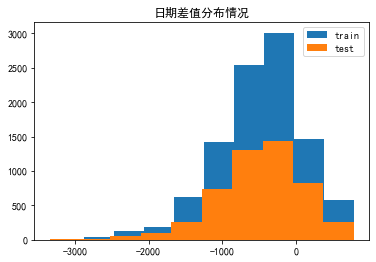

In [25]:
plt.hist(train_bank['issueDateDT'], label='train');
plt.hist(test['issueDateDT'], label='test');
plt.legend();
plt.title('日期差值分布情况');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割

### 2.8 数值变量处理

In [26]:
#过滤数值型类别特征(数值小于10)
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(train_bank,numerical_fea)

In [27]:
##连续特征
print('一共有数值特征',len(numerical_serial_fea),'个数值特征')
numerical_serial_fea

一共有数值特征 23 个数值特征


['loan_id',
 'user_id',
 'total_loan',
 'interest',
 'monthly_payment',
 'use',
 'post_code',
 'region',
 'debt_loan_ratio',
 'del_in_18month',
 'scoring_low',
 'scoring_high',
 'known_outstanding_loan',
 'known_dero',
 'recircle_b',
 'recircle_u',
 'title',
 'f0',
 'f2',
 'f3',
 'f4',
 'early_return_amount',
 'early_return_amount_3mon']

In [28]:
##离散特征，可以按照类别特征处理
numerical_noserial_fea

['year_of_loan',
 'house_exist',
 'censor_status',
 'pub_dero_bankrup',
 'initial_list_status',
 'app_type',
 'policy_code',
 'f1',
 'early_return',
 'isDefault']

#### 2.8.1 离散特征查看

3    7602
5    2398
Name: year_of_loan, dtype: int64


<AxesSubplot:title={'center':'year_of_loand=5年占比'}, ylabel='isDefault'>

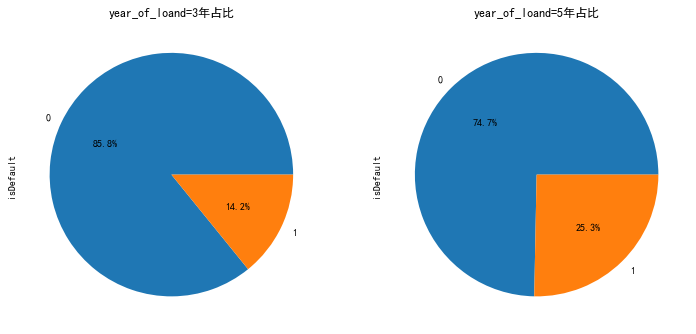

In [29]:
###离散型变量year_of_loan
print(train_bank['year_of_loan'].value_counts())
_,axe=plt.subplots(1,2,figsize=(12,6))
train_bank[train_bank['year_of_loan']==3].isDefault.value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axe[0],title='year_of_loand=3年占比')
train_bank[train_bank['year_of_loan']==5].isDefault.value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axe[1],title='year_of_loand=5年占比')

In [30]:
###离散型变量house_exist
train_bank['house_exist'].value_counts()

0    4945
1    3992
2    1060
3       2
4       1
Name: house_exist, dtype: int64

In [31]:
###离散型变量censor_status
train_bank['censor_status'].value_counts()

1    3794
2    3176
0    3030
Name: censor_status, dtype: int64

In [32]:
###离散型变量pub_dero_bankrup
train_bank['pub_dero_bankrup'].value_counts()

0.0    8697
1.0    1223
2.0      58
3.0      12
5.0       2
4.0       1
Name: pub_dero_bankrup, dtype: int64

In [33]:
###离散型变量initial_list_status
train_bank['initial_list_status'].value_counts()

0    5859
1    4141
Name: initial_list_status, dtype: int64

In [34]:
###离散型变量app_type
train_bank['app_type'].value_counts()

0    9800
1     200
Name: app_type, dtype: int64

In [35]:
###离散型变量app_type
train_bank['app_type'].value_counts()

0    9800
1     200
Name: app_type, dtype: int64

In [36]:
###离散型变量policy_code
train_bank['policy_code'].value_counts()

1    10000
Name: policy_code, dtype: int64

In [37]:
###离散型变量f1
train_bank['f1'].value_counts()

0.0    9129
1.0      13
Name: f1, dtype: int64

In [38]:
###离散型变量early_return
train_bank['early_return'].value_counts()

0    4906
3    2671
1    1003
2    1002
5     214
4     204
Name: early_return, dtype: int64

### 2.8.2连续特征

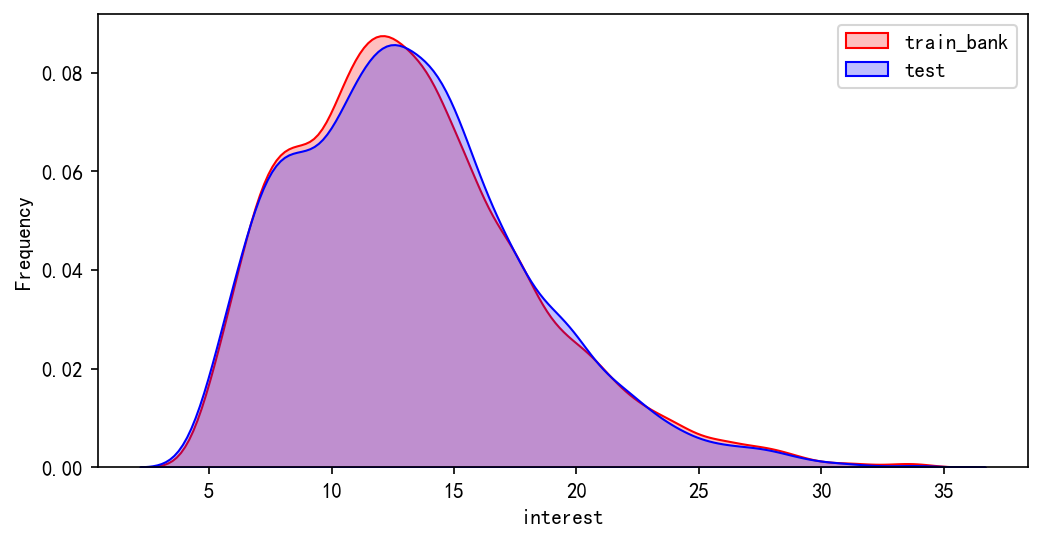

In [39]:
plt.figure(figsize=(8,4),dpi=150)
ax=sns.kdeplot(train_bank['interest'],color='red',shade=True)
ax=sns.kdeplot(test['interest'],color='blue',shade=True)
ax.set_xlabel('interest')
ax.set_ylabel('Frequency')
ax=ax.legend(['train_bank','test'])

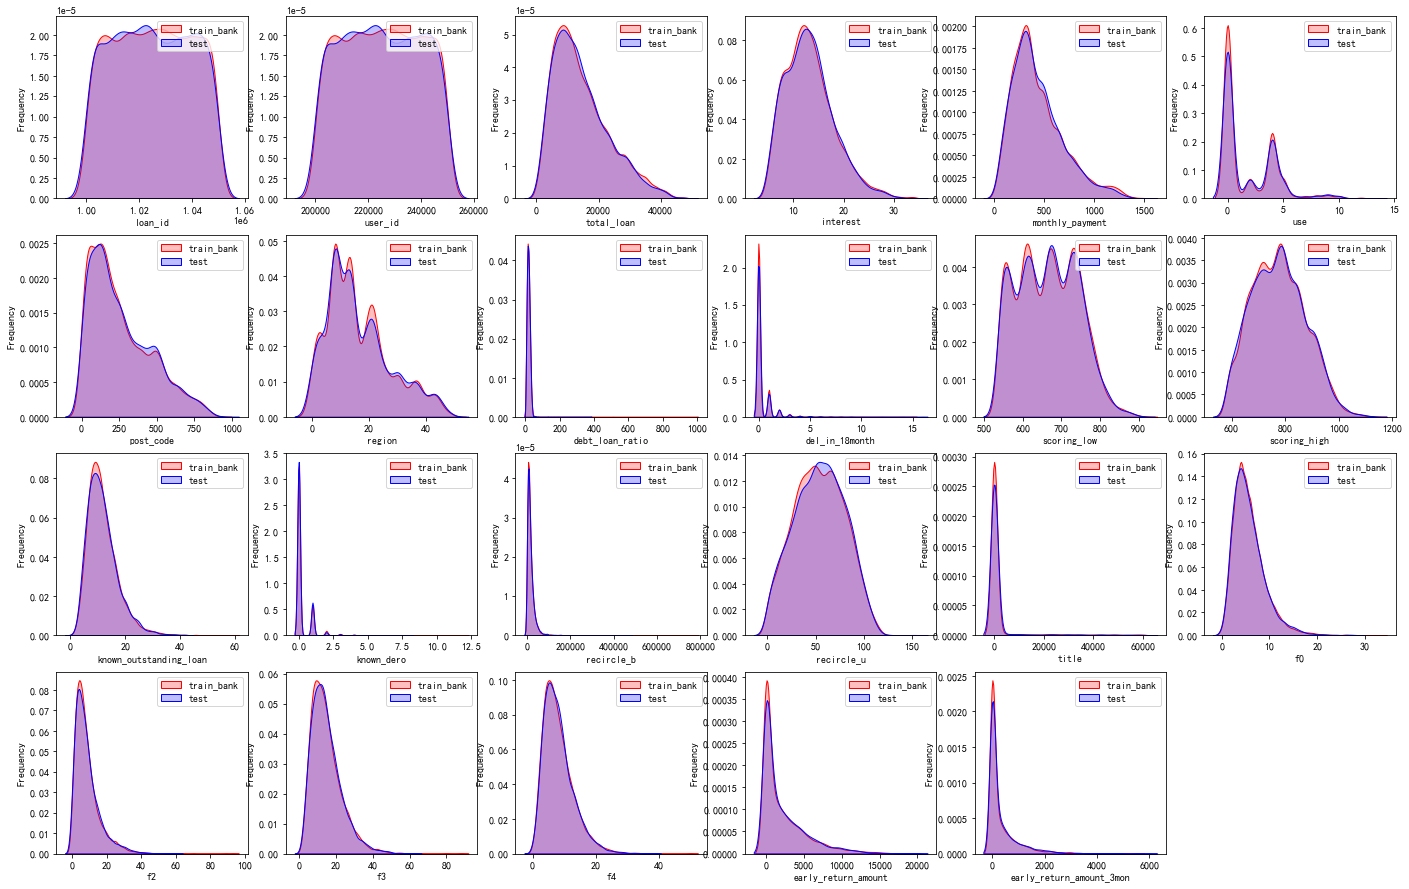

In [40]:
dist_cols=6
dist_rows=len(test.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))
i=1
for col in numerical_serial_fea:
    ax=plt.subplot(dist_rows,dist_cols,i)
    ax=sns.kdeplot(train_bank[col],color='red',shade=True)
    ax=sns.kdeplot(test[col],color='blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax=ax.legend(['train_bank','test'])
    i+=1
plt.show()

In [41]:
#寻找两个数据集相同的列
common_cols = []   
for col in train_bank.columns:
    if col in train_internet.columns:
        common_cols.append(col)
    else: continue
len(common_cols)

35

In [42]:
i=0
for i in range(6):
    common_cols.remove(category_fea[i])

In [43]:
len(common_cols)

29

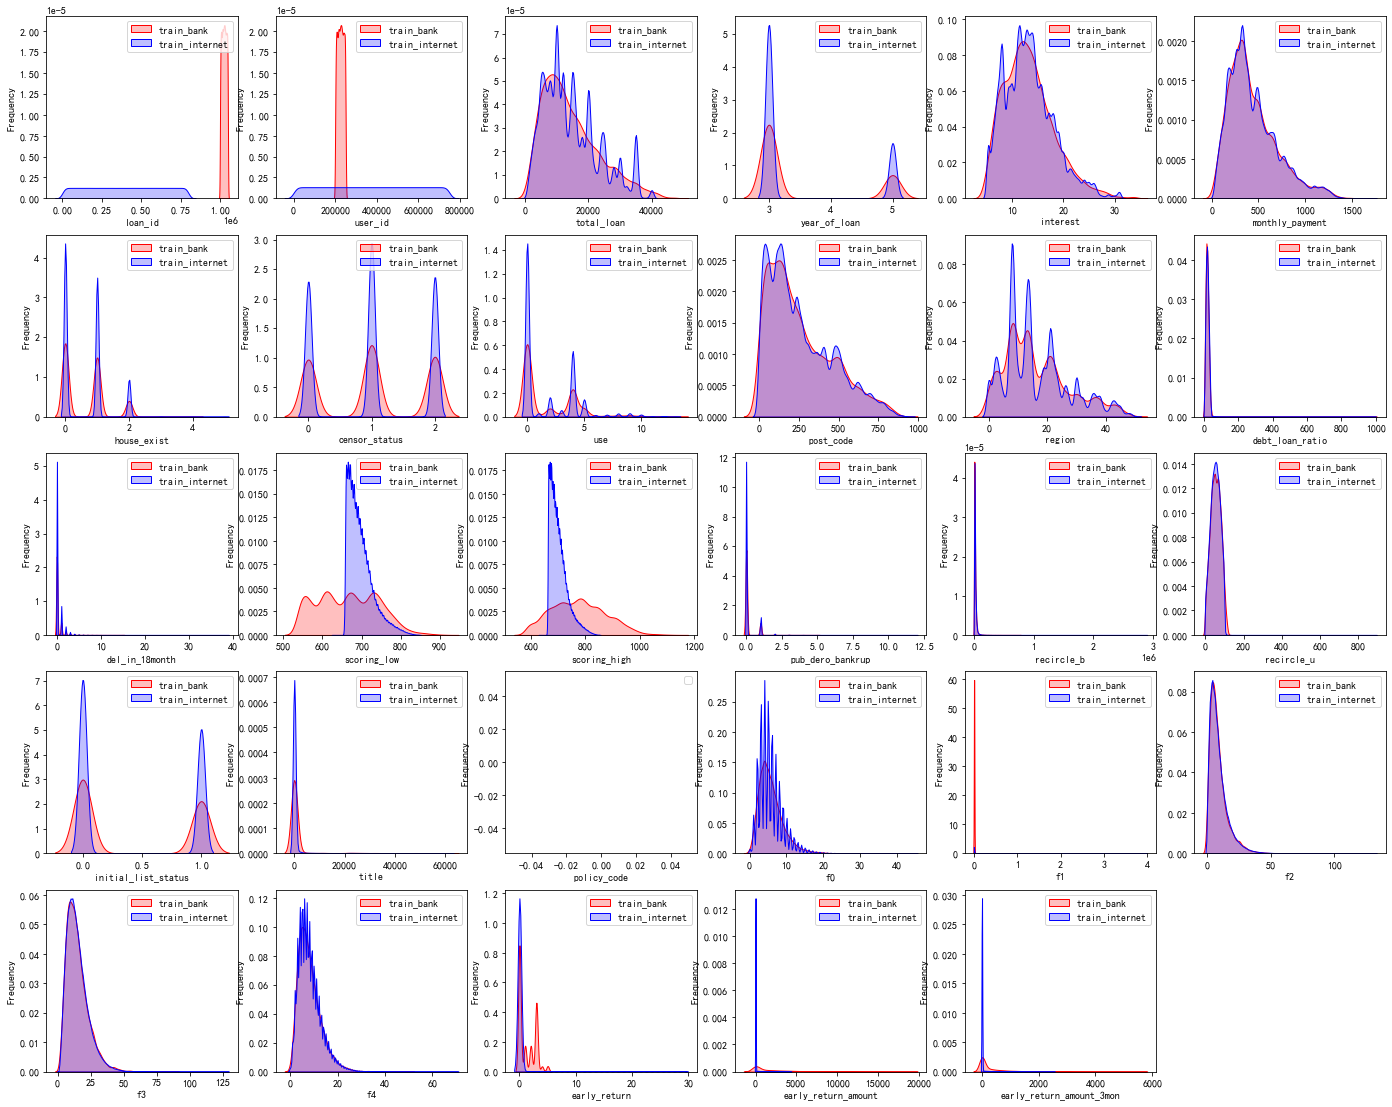

In [44]:
dist_cols=6
dist_rows=len(train_internet.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))
i=1
for col in common_cols:
    ax=plt.subplot(dist_rows,dist_cols,i)
    ax=sns.kdeplot(train_bank[col],color='red',shade=True)
    ax=sns.kdeplot(train_internet[col],color='blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax=ax.legend(['train_bank','train_internet'])
    i+=1
plt.show()

In [45]:
###计算阶乘
from scipy.special import comb, perm
comb(29,2) 

406.0

scoring_low/scoring_hight在internet和bank数据分布差别比较大
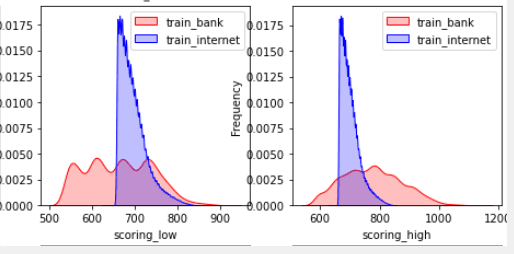